<a href="https://colab.research.google.com/github/jong4Dev/Credit-Card-Fraud-Detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

## Load dan Eksplorasi Data

In [ ]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset/Credit Card Fraud Detection/creditcard.csv')

# Tampilkan 5 baris pertama
print(data.head())

# Cek informasi dataset
print(data.info())

# Cek distribusi kelas (fraud vs non-fraud)
print(data['Class'].value_counts())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

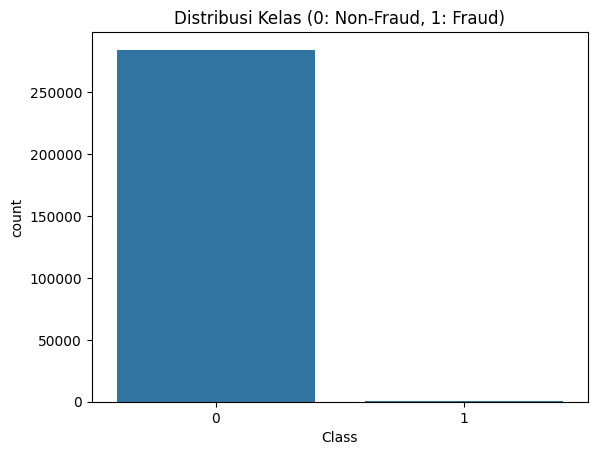

In [ ]:
sns.countplot(x='Class', data=data)
plt.title('Distribusi Kelas (0: Non-Fraud, 1: Fraud)')
plt.show()

## Preprocessing Data

In [ ]:
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
# Scaling fitur
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

In [ ]:
# Pisahkan fitur dan target
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Menangani Data Tidak Seimbang

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

## Membangun Model

In [ ]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(random_state=42),
}

## Evaluasi Model

Training Logistic Regression...
Evaluating Logistic Regression...
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

ROC-AUC Score: 0.9698482164390798

Training Random Forest...
Evaluating Random Forest...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC Score: 0.973103297664029

Training XGBoost...
Evaluating XGBoost...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
      

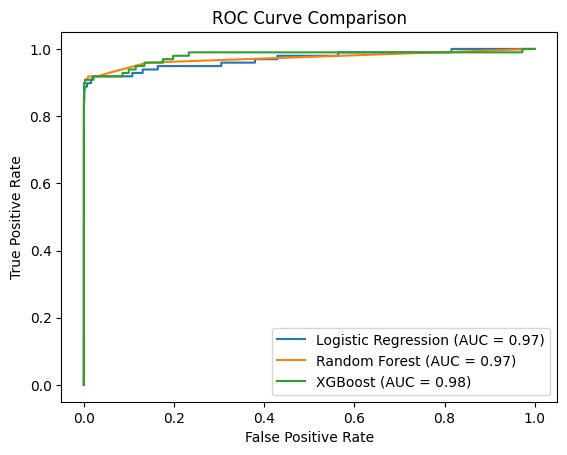

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Dictionary untuk menyimpan hasil evaluasi
results = {}

# Loop melalui setiap model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_res, y_train_res)  # Latih model
    y_pred = model.predict(X_test)  # Prediksi
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilitas untuk ROC-AUC

    # Evaluasi
    print(f"Evaluating {name}...")
    print(classification_report(y_test, y_pred))
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC-AUC Score: {roc_auc}\n")

    # Simpan hasil
    results[name] = {
        "classification_report": classification_report(y_test, y_pred, output_dict=True),
        "roc_auc": roc_auc
    }

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot semua ROC Curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()